<h1 style="color: blue; text-align: center; font-size: 25px;"><b>PhiUSIIL: A Machine Learning-Based Phishing URL Classifier</b></h1>
<h1 style="color: blue; text-align: center; font-size: 20px;"><b>DSML Capstone Project</b></h1>

### Problem Description :
With the increasing reliance on the internet for financial transactions, personal communications, and business operations, phishing attacks have emerged as a significant cybersecurity threat. Phishing websites impersonate legitimate entities to deceive users into revealing sensitive information, such as passwords, credit card details, and personal data.

Detecting phishing websites accurately and efficiently is a crucial challenge in cybersecurity. Traditional methods, such as blacklists, fail to detect new phishing sites in real time. Therefore, machine learning-based approaches using URL and webpage source code features have gained prominence in identifying phishing threats proactively.

In this project, we utilize the PhiUSIIL Phishing URL Dataset, which contains 134,850 legitimate URLs and 100,945 phishing URLs, to develop a robust phishing detection model. The dataset includes features extracted from the webpage source code and URL structure, such as CharContinuationRate, URLTitleMatchScore, URLCharProb, and TLDLegitimateProb, which are derived from existing URL-based attributes.

### Objective :
To analyze these features and implement machine learning techniques to classify URLs as legitimate or phishing, improving the accuracy and efficiency of phishing detection systems. Through this project, we aim to contribute to the development of automated security solutions that help protect users from online fraud and cyber threats.

### DataSet :
(https://archive.ics.uci.edu/dataset/967/phiusiil+phishing+url+dataset)

### Understand the Dataset

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

#### Loading

In [6]:
data=pd.read_csv("PhiUSIIL_Phishing_URL_Dataset.csv")

In [7]:
data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [8]:
data.tail()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
235790,660997.txt,https://www.skincareliving.com,29,www.skincareliving.com,22,0,com,100.000000,1.000000,0.522907,...,1,0,1,51,7,21,187,2,191,1
235791,77185.txt,https://www.winchester.gov.uk,28,www.winchester.gov.uk,21,0,uk,100.000000,0.785714,0.028555,...,1,0,0,50,1,7,88,0,31,1
235792,622132.txt,https://www.nononsensedesign.be,30,www.nononsensedesign.be,23,0,be,100.000000,1.000000,0.003319,...,0,0,1,27,10,30,58,2,67,1
235793,7503962.txt,https://patient-cell-40f5.updatedlogmylogin.wo...,55,patient-cell-40f5.updatedlogmylogin.workers.dev,47,0,dev,28.157537,0.465116,0.000961,...,0,0,0,0,0,3,0,0,0,0
235794,384822.txt,https://www.alternativefinland.com,33,www.alternativefinland.com,26,0,com,100.000000,1.000000,0.522907,...,0,0,1,21,6,18,256,0,261,1


In [9]:
data.shape

(235795, 56)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [11]:
data.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516,0.571895
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430,0.494805
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000,1.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000,1.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000,1.000000


In [12]:
data.groupby("label").describe()

URLLength                                                        \
          count       mean        std   min   25%   50%   75%     max   
label                                                                   
0      100945.0  45.720293  61.145523  13.0  26.0  34.0  48.0  6097.0   
1      134850.0  26.228610   4.815612  15.0  23.0  26.0  29.0    57.0   

      DomainLength             ... NoOfEmptyRef         NoOfExternalRef  \
             count       mean  ...          75%     max           count   
label                          ...                                        
0         100945.0  24.465144  ...          0.0    91.0        100945.0   
1         134850.0  19.228610  ...          3.0  4887.0        134850.0   

                                                               
            mean         std  min   25%   50%    75%      max  
label                                                          
0       1.128119    3.204587  0.0   0.0   0.0    1.0    368.0  
1      85.294601  205.669475  0.0  17.0  46.0  106.0  27516.0  

[2 rows x 400 columns]

## Preprocessing and EDA

**checking for null values**

In [14]:
data.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

**Checking for duplicates**

In [16]:
data.duplicated().sum()

0

<font color=green size=3 >No null values or duplicates founded!

**Check class distribution for finding imbalance**

In [19]:
print(data['label'].value_counts())

label
1    134850
0    100945
Name: count, dtype: int64


In [20]:
#Calculate Class Imbalance Ratio
maj_cls=data['label'].value_counts().max()
min_cls=data['label'].value_counts().min()
ratio=maj_cls/min_cls
print(f"Class Imbalance Ratio: {ratio:.2f}")

Class Imbalance Ratio: 1.34


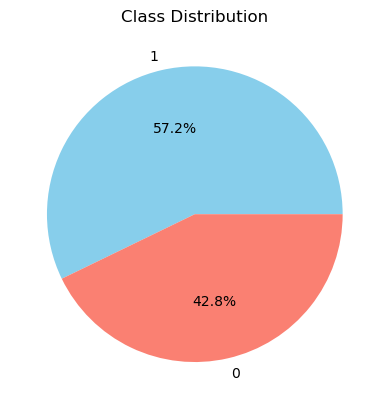

In [21]:
data['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title("Class Distribution")
plt.ylabel("")
plt.show()

Having a mild imbalance (ratio : 1.34), which does not affect the model accuracy.

### Univariate Analysis

**Finding Categorical features for EDA.**

In [25]:
categorical=data.select_dtypes(include='object').columns
categorical

Index(['FILENAME', 'URL', 'Domain', 'TLD', 'Title'], dtype='object')

Column 'FILENAME' can be ignored.

In [126]:
#making a copy
df=data.copy()

In [128]:
df.drop(columns='FILENAME', inplace=True)

In [29]:
updated_categorical=df.select_dtypes(include='object').columns
updated_categorical

Index(['URL', 'Domain', 'TLD', 'Title'], dtype='object')

**Finding numerical featues**

In [58]:
numerical=df.select_dtypes(include='number').columns
numerical

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL',
       'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL',
       'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'NoOfExternalRef', 'label'],
      dtype='object')

**Exclude Binary (0/1) Columns**

In [66]:
# Identify binary columns (only contain 0 and 1)
binary_cols=[col for col in numerical if df[col].nunique()==2]

## Exclude binary columns from numerical analysis
univariate_cols= [col for col in numerical if df[col].nunique()!=2]

print("Numerical columns for univariate analysis:", univariate_cols)
print (f"There are {len(univariate_cols)} numerical features for univariate analysis.")

Numerical columns for univariate analysis: ['URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']
There are 31 numerical features for univariate analysis.


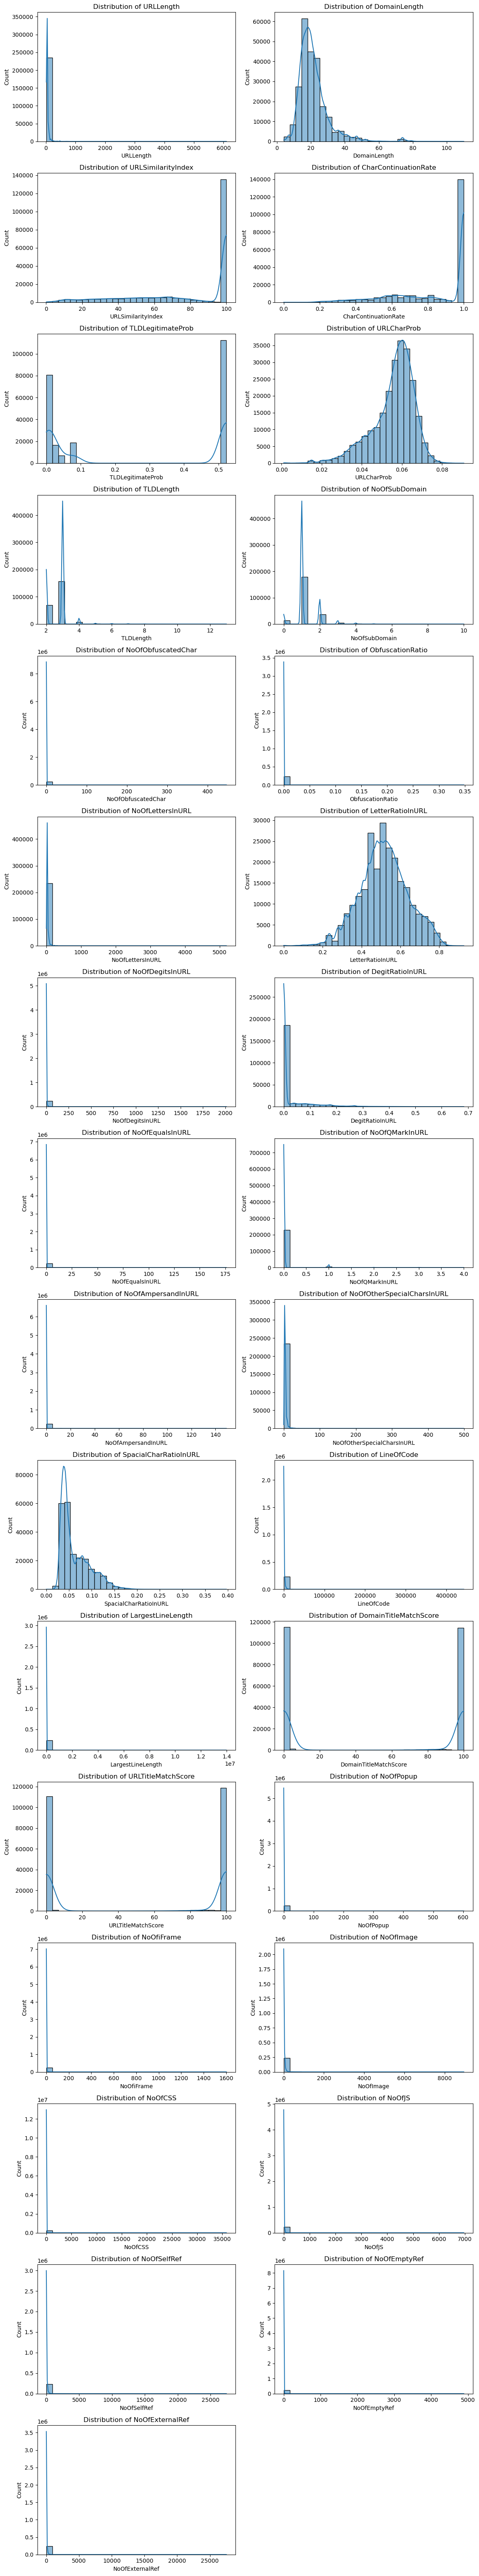

In [72]:
# Assuming df is your DataFrame and univariate_numerical_cols is your list of columns
num_cols = len(univariate_cols)
rows = (num_cols + 1) // 2  # Calculate required rows (ceil division for odd numbers)

fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))  # Adjust size accordingly
axes = axes.flatten()  # Flatten in case of multiple rows

for i, col in enumerate(univariate_cols):
    sns.histplot(df[col], kde=True, bins=30,ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()
    
# for col in univariate_cols:
#     plt.figure(figsize=(6, 4))
#     sns.histplot(df[col], kde=True, bins=30)
#     plt.title(f'Distribution of {col}')
#     plt.show()

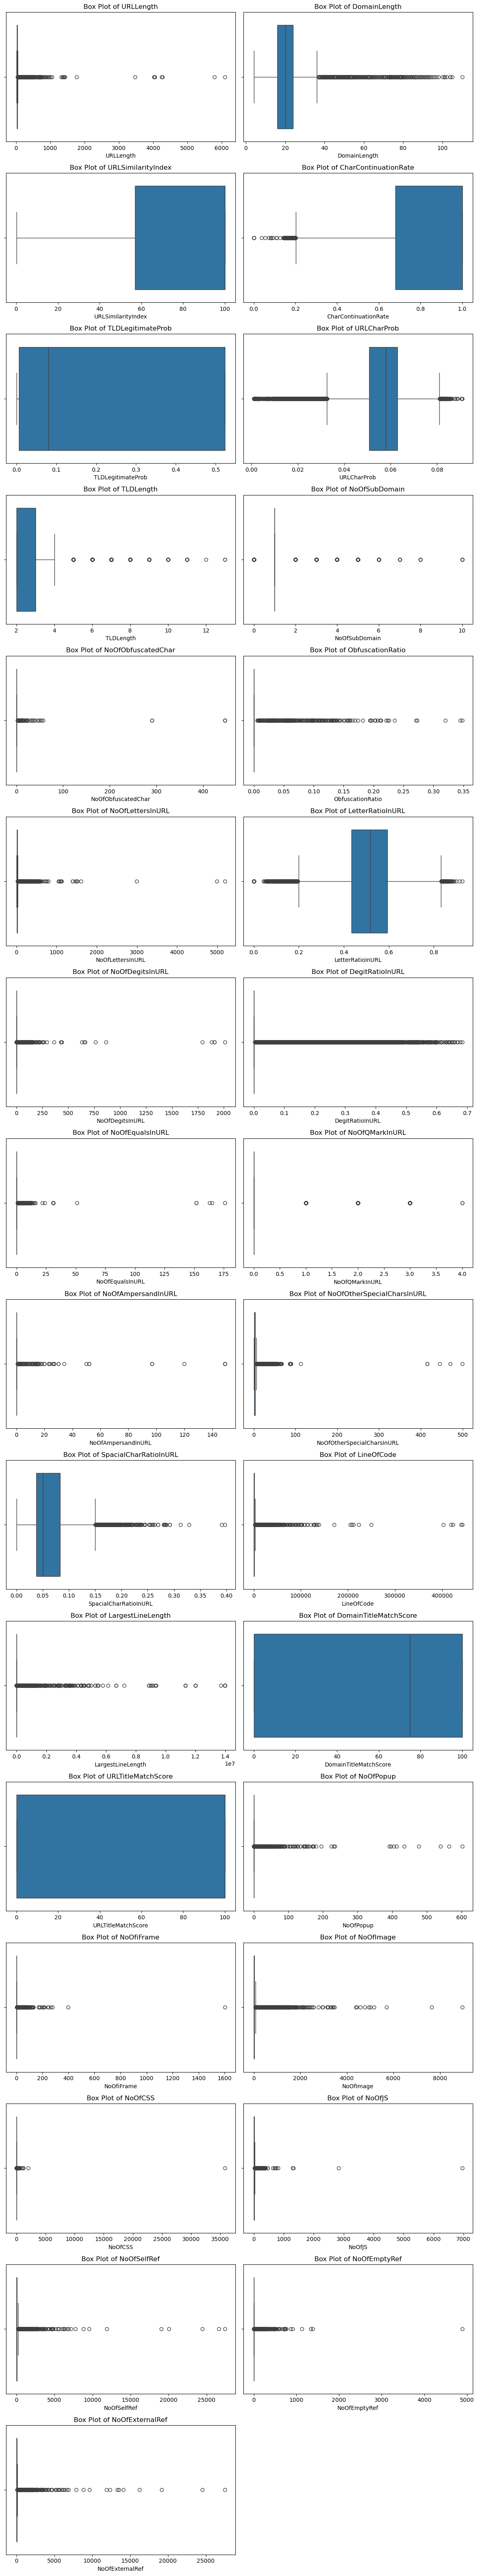

In [70]:
# Assuming df is your DataFrame and univariate_numerical_cols is your list of columns
num_cols = len(univariate_cols)
rows = (num_cols + 1) // 2  # Calculate required rows (ceil division for odd numbers)

fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))  # Adjust size accordingly
axes = axes.flatten()  # Flatten in case of multiple rows

for i, col in enumerate(univariate_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#### Checking Skewness and Kurtosis
**Skewness**

In [130]:
df[univariate_cols].skew()

URLLength                      53.321737
DomainLength                    2.513397
URLSimilarityIndex             -0.989903
CharContinuationRate           -1.128591
TLDLegitimateProb               0.073090
URLCharProb                    -1.064291
TLDLength                       1.663518
NoOfSubDomain                   1.809400
NoOfObfuscatedChar            204.684335
ObfuscationRatio               40.118612
NoOfLettersInURL               58.402581
LetterRatioInURL               -0.066358
NoOfDegitsInURL                94.877574
DegitRatioInURL                 3.244523
NoOfEqualsInURL               114.985479
NoOfQMarkInURL                  8.160618
NoOfAmpersandInURL            106.717256
NoOfOtherSpecialCharsInURL     47.428522
SpacialCharRatioInURL           1.184134
LineOfCode                     53.072297
LargestLineLength              48.179926
DomainTitleMatchScore          -0.008735
URLTitleMatchScore             -0.089085
NoOfPopup                      84.952694
NoOfiFrame      

**Kurtosis**

In [82]:
df[univariate_cols].kurtosis()

URLLength                       5914.008979
DomainLength                      10.660247
URLSimilarityIndex                -0.408037
CharContinuationRate               0.056455
TLDLegitimateProb                 -1.973777
URLCharProb                        1.461184
TLDLength                         13.738667
NoOfSubDomain                      7.788128
NoOfObfuscatedChar             45903.366997
ObfuscationRatio                2125.333536
NoOfLettersInURL                8587.893558
LetterRatioInURL                   0.015907
NoOfDegitsInURL                14318.789145
DegitRatioInURL                   12.236281
NoOfEqualsInURL                19379.093750
NoOfQMarkInURL                    84.597833
NoOfAmpersandInURL             16435.636935
NoOfOtherSpecialCharsInURL      5657.868346
SpacialCharRatioInURL              0.976044
LineOfCode                      5597.197274
LargestLineLength               3212.606584
DomainTitleMatchScore             -1.992655
URLTitleMatchScore              

<font color=red size=3> High Skewness and Kurtosis founded!!

### Outlier Removal

In [239]:
df=data.copy()

In [241]:
for col in univariate_cols:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    l_w=q1-iqr*1.5
    u_w=q3+iqr*1.5

     # Remove extreme outliers
    df = df[(df[col] >= l_w) & (df[col] <= u_w)] 

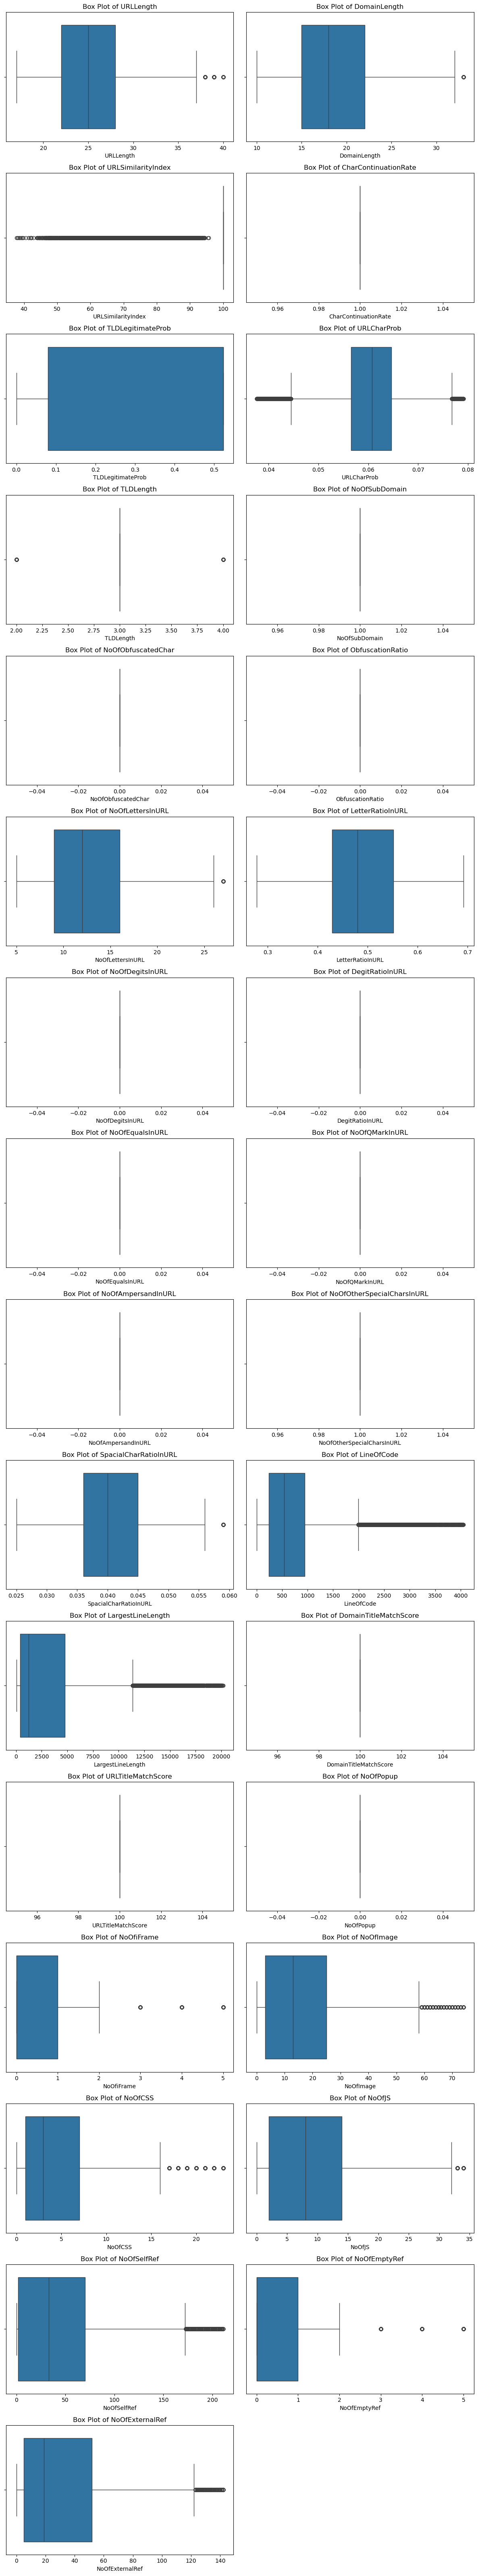

In [227]:
# Assuming df is your DataFrame and univariate_numerical_cols is your list of columns
num_cols = len(univariate_cols)
rows = (num_cols + 1) // 2  # Calculate required rows (ceil division for odd numbers)

fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))  # Adjust size accordingly
axes = axes.flatten()  # Flatten in case of multiple rows

for i, col in enumerate(univariate_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

#### For Right-Skewed Data (Positive Skewness):
Use log, square root, or box-cox transformation.

In [229]:
right_skewed_cols = df[univariate_cols].skew()[df[univariate_cols].skew() > 1].index.tolist()
df[right_skewed_cols].skew()

LineOfCode           1.769755
LargestLineLength    1.518899
NoOfiFrame           1.698664
NoOfImage            1.128232
NoOfCSS              1.295825
NoOfSelfRef          1.028042
NoOfEmptyRef         2.025227
NoOfExternalRef      1.184800
dtype: float64

In [231]:
for col in right_skewed_cols:
     df[col] = np.cbrt(df[col])
df[right_skewed_cols].skew()

LineOfCode          -0.344373
LargestLineLength    0.560702
NoOfiFrame           0.798735
NoOfImage           -0.602847
NoOfCSS             -0.472063
NoOfSelfRef         -0.406363
NoOfEmptyRef         1.004879
NoOfExternalRef     -0.264541
dtype: float64

<font color=green size=3>Right skewness is removed and is moderately skewed now.

#### For Left-Skewed Data (Negative Skewness):
Use power transformation (square or cube root) or negation.

In [243]:
left_skewed_cols = df[univariate_cols].skew()[df[univariate_cols].skew() <-1 ].index.tolist()
df[left_skewed_cols].skew()
# # Apply square transformation
# for col in left_skewed_cols:
#     df[col] = df[col] ** 2

URLSimilarityIndex   -2.351163
TLDLength            -1.209396
dtype: float64

In [245]:
from sklearn.preprocessing import PowerTransformer
dfcopy=df.copy()

for col in ['URLSimilarityIndex', 'TLDLength']:
    skewness = dfcopy[col].skew()
    
    if skewness < -2:
        print(f"Applying square transformation on {col}")
        dfcopy[col] = dfcopy[col] ** 2  # Square transformation
        
    elif -2 < skewness < -1:
        print(f"Applying Yeo-Johnson transformation on {col}")
        transformer = PowerTransformer(method='yeo-johnson')
        dfcopy[col] = transformer.fit_transform(dfcopy[[col]])


Applying square transformation on URLSimilarityIndex
Applying Yeo-Johnson transformation on TLDLength


In [247]:
dfcopy[left_skewed_cols].skew()

URLSimilarityIndex   -2.171245
TLDLength             0.396535
dtype: float64

In [253]:
col = 'URLSimilarityIndex'

# Check if all values are negative
if (dfcopy[col] < 0).all():
    print(f"Applying exponential transformation on {col}")
    dfcopy[col] = np.exp(dfcopy[col])  # Exponential for strongly left-skewed negative data

elif dfcopy[col].min() >= 0:  
    print(f"Applying cubic transformation on {col}")
    dfcopy[col] = dfcopy[col] ** 3  # Cubic transformation for strong left skew

else:
    print(f"Applying inverse transformation on {col}")
    dfcopy[col] = 1 / (dfcopy[col] - dfcopy[col].min() + 1)  # Inverse transformation



Applying cubic transformation on URLSimilarityIndex


In [257]:
# Recalculate skewness
print(f"New skewness for {col}: {dfcopy['URLSimilarityIndex'].skew()}")

New skewness for URLSimilarityIndex: -1.8758953354035364


In [259]:
df['URLSimilarityIndex']=dfcopy['URLSimilarityIndex']

In [261]:
df['TLDLength']=dfcopy['TLDLength']

In [281]:
df[univariate_cols].skew()

URLLength                     0.531440
DomainLength                  0.538420
URLSimilarityIndex           -1.875895
CharContinuationRate          0.000000
TLDLegitimateProb            -0.505509
URLCharProb                  -0.390922
TLDLength                     0.396535
NoOfSubDomain                 0.000000
NoOfObfuscatedChar            0.000000
ObfuscationRatio              0.000000
NoOfLettersInURL              0.538641
LetterRatioInURL             -0.222983
NoOfDegitsInURL               0.000000
DegitRatioInURL               0.000000
NoOfEqualsInURL               0.000000
NoOfQMarkInURL                0.000000
NoOfAmpersandInURL            0.000000
NoOfOtherSpecialCharsInURL    0.000000
SpacialCharRatioInURL         0.257630
LineOfCode                    1.769755
LargestLineLength             1.518899
DomainTitleMatchScore         0.000000
URLTitleMatchScore            0.000000
NoOfPopup                     0.000000
NoOfiFrame                    1.698664
NoOfImage                

In [273]:
df[numerical].skew()

URLLength                     0.531440
DomainLength                  0.538420
IsDomainIP                    0.000000
URLSimilarityIndex           -1.875895
CharContinuationRate          0.000000
TLDLegitimateProb            -0.505509
URLCharProb                  -0.390922
TLDLength                     0.396535
NoOfSubDomain                 0.000000
HasObfuscation                0.000000
NoOfObfuscatedChar            0.000000
ObfuscationRatio              0.000000
NoOfLettersInURL              0.538641
LetterRatioInURL             -0.222983
NoOfDegitsInURL               0.000000
DegitRatioInURL               0.000000
NoOfEqualsInURL               0.000000
NoOfQMarkInURL                0.000000
NoOfAmpersandInURL            0.000000
NoOfOtherSpecialCharsInURL    0.000000
SpacialCharRatioInURL         0.257630
IsHTTPS                      -1.698346
LineOfCode                    1.769755
LargestLineLength             1.518899
HasTitle                      0.000000
DomainTitleMatchScore    

**considering correlation of features with the label (Target)** 

label                         1.000000
URLSimilarityIndex            0.860358
HasSocialNet                  0.784255
HasCopyrightInfo              0.743358
HasDescription                0.690232
IsHTTPS                       0.609132
DomainTitleMatchScore         0.584905
HasSubmitButton               0.578561
IsResponsive                  0.548608
URLTitleMatchScore            0.539419
SpacialCharRatioInURL         0.533537
HasHiddenFields               0.507731
HasFavicon                    0.493711
URLCharProb                   0.469749
CharContinuationRate          0.467735
HasTitle                      0.459725
DegitRatioInURL               0.432032
Robots                        0.392620
NoOfJS                        0.373500
LetterRatioInURL              0.367794
Pay                           0.359747
NoOfOtherSpecialCharsInURL    0.358891
NoOfSelfRef                   0.316211
DomainLength                  0.283152
NoOfImage                     0.274658
LineOfCode               

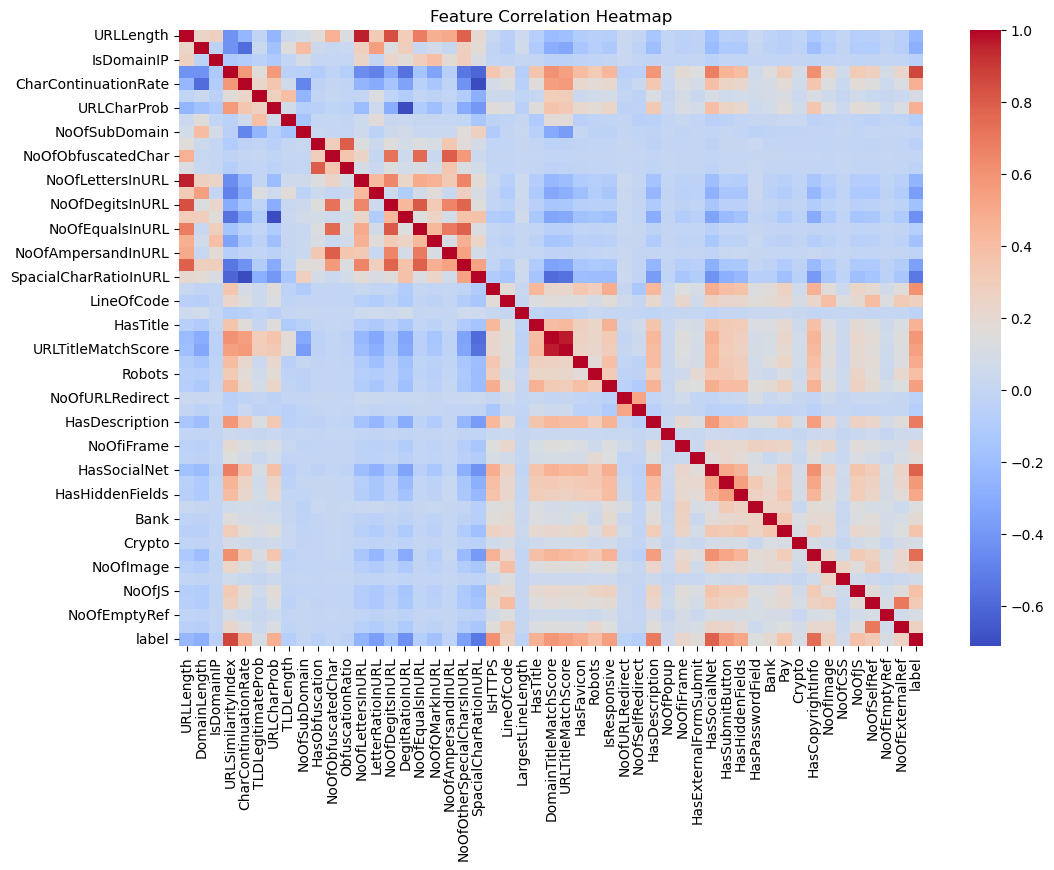

In [265]:
# Compute correlation
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
correlation_with_label = correlation_matrix["label"].abs().sort_values(ascending=False)

# Print top correlated features
print(correlation_with_label)

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

As considering the skewness and correlation with the Target,some features are droping.

In [306]:
df_skew_removed = df.drop(columns=['NoOfEmptyRef', 'LargestLineLength', 'NoOfiFrame'])


In [308]:
df_skew_removed.drop(columns="LineOfCode",inplace=True)

In [310]:
numerical=df_skew_removed.select_dtypes(include='number').columns

univariate_cols= [col for col in numerical if df_skew_removed[col].nunique()!=2]
df_skew_removed[univariate_cols].skew()

URLLength                     0.531440
DomainLength                  0.538420
IsDomainIP                    0.000000
URLSimilarityIndex           -1.875895
CharContinuationRate          0.000000
TLDLegitimateProb            -0.505509
URLCharProb                  -0.390922
TLDLength                     0.396535
NoOfSubDomain                 0.000000
HasObfuscation                0.000000
NoOfObfuscatedChar            0.000000
ObfuscationRatio              0.000000
NoOfLettersInURL              0.538641
LetterRatioInURL             -0.222983
NoOfDegitsInURL               0.000000
DegitRatioInURL               0.000000
NoOfEqualsInURL               0.000000
NoOfQMarkInURL                0.000000
NoOfAmpersandInURL            0.000000
NoOfOtherSpecialCharsInURL    0.000000
SpacialCharRatioInURL         0.257630
HasTitle                      0.000000
DomainTitleMatchScore         0.000000
URLTitleMatchScore            0.000000
NoOfPopup                     0.000000
NoOfImage                

<font color=green size=3>Now we got moderately skewed (almost) features!!

### Feature Selection using Select KBest method
Because of large number of features, We need to choose the best set and doing further analysis.

In [ ]:
Finding which outlier detection is best.

In [312]:
df_skew_removed.shape

(48309, 52)

In [317]:
df.shape

(48309, 56)

In [321]:
data.shape

(235795, 56)

##### Threshold changed to 3 from 1.5 in IQR method.

In [339]:
df1=data.copy()

In [341]:
for col in univariate_cols:
    q1=df1[col].quantile(0.25)
    q3=df1[col].quantile(0.75)
    iqr=q3-q1
    l_w=q1-iqr*3
    u_w=q3+iqr*3

     # Remove extreme outliers
    df1 = df1[(df1[col] >= l_w) & (df1[col] <= u_w)] 

In [343]:
df1.shape

(79984, 56)

##### Trying Zscore method

In [347]:
df2=data.copy()

In [349]:
from scipy.stats import zscore

# Compute Z-scores
z_scores = df2.apply(zscore)

# Define threshold (usually 3, but you can adjust)
threshold = 3
df_z_removed = df2[(z_scores < threshold).all(axis=1)]
df_z_removed.shape

TypeError: unsupported operand type(s) for /: 'str' and 'int'